In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict

In [128]:
#Read in the data
data = pd.read_csv("Lekagul Sensor Data.csv")
data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [129]:
#Check each column's data type
data.dtypes

Timestamp    object
car-id       object
car-type     object
gate-name    object
dtype: object

In [130]:
#Check for nulls
data.isna().sum()

Timestamp    0
car-id       0
car-type     0
gate-name    0
dtype: int64

In [131]:
#Change variables to appropriate type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['car-type'] = data['car-type'].astype('category')
data['gate-name'] = data['gate-name'].astype('category')
#data[['car_id1', 'car_id2']] = data['car-id'].str.split('-', expand=True)
#data['car_id1'] = pd.to_numeric(data['car_id1'])
#data['car_id2'] = pd.to_numeric(data['car_id2'])
#data = data.drop('car-id', axis=1)
data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [132]:
#Check each column's data type again
data.dtypes

Timestamp    datetime64[ns]
car-id               object
car-type           category
gate-name          category
dtype: object

In [133]:
#Describe the statistics of the base data
data.describe()

/var/folders/cr/vfq_sd4d21n4gk63s5b8v_dh0000gn/T/ipykernel_2556/2462266413.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,Timestamp,car-id,car-type,gate-name
count,171477,171477,171477,171477
unique,170298,18708,7,40
top,2015-07-31 12:00:02,20154519024544-322,1,general-gate7
freq,5,281,67698,16119
first,2015-05-01 00:43:28,NaN,NaN,NaN
last,2016-05-31 23:56:06,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'Timestamp'}>]], dtype=object)

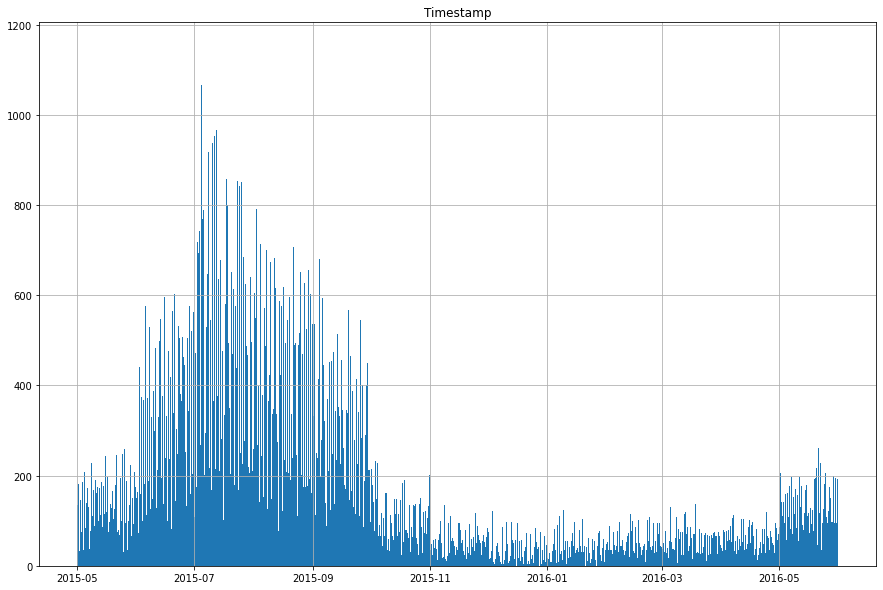

In [134]:
#Visualize distribution of each column & outliers
data.hist(bins=1000, figsize=(15, 10))

[(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (255, 255, 255), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0,

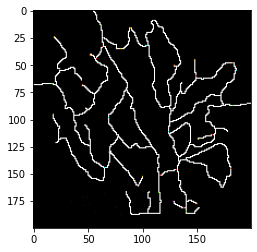

In [135]:
#load in bmp
img = Image.open('Lekagul Roadways.bmp')
w, h = img.size

bmp = img.convert(mode="RGB")
pixel_values = list(bmp.getdata())
print(pixel_values)
plt.imshow(bmp,vmin=0,vmax=255)

In [136]:
#get colors
colors = set(pixel_values)
colors

{(0, 0, 0),
 (0, 255, 255),
 (1, 1, 1),
 (2, 2, 2),
 (3, 3, 3),
 (5, 5, 5),
 (6, 6, 6),
 (8, 8, 8),
 (9, 9, 9),
 (14, 14, 14),
 (16, 16, 16),
 (17, 17, 17),
 (18, 18, 18),
 (19, 19, 19),
 (20, 20, 20),
 (21, 21, 21),
 (22, 22, 22),
 (23, 23, 23),
 (24, 24, 24),
 (25, 25, 25),
 (31, 31, 31),
 (46, 46, 46),
 (64, 64, 64),
 (65, 65, 65),
 (66, 66, 66),
 (67, 67, 67),
 (68, 68, 68),
 (70, 70, 70),
 (72, 72, 72),
 (76, 255, 0),
 (239, 239, 239),
 (255, 0, 0),
 (255, 0, 220),
 (255, 106, 0),
 (255, 216, 0),
 (255, 255, 255)}

In [137]:
# (0, 0, 0), black
#  (0, 255, 255), cyan
#  (1, 1, 1), black
#  (2, 2, 2), black
#  (3, 3, 3), black
#  (5, 5, 5), black
#  (6, 6, 6), black
#  (8, 8, 8), black
#  (9, 9, 9), black
#  (14, 14, 14), black
#  (16, 16, 16),black
#  (17, 17, 17),black
#  (18, 18, 18),black
#  (19, 19, 19),black
#  (20, 20, 20),black
#  (21, 21, 21),black
#  (22, 22, 22),black
#  (23, 23, 23),black
#  (24, 24, 24),black
#  (25, 25, 25),black
#  (31, 31, 31),black
#  (46, 46, 46),black
#  (64, 64, 64),black
#  (65, 65, 65),black
#  (66, 66, 66),black
#  (67, 67, 67),black
#  (68, 68, 68),black
#  (70, 70, 70),black
#  (72, 72, 72),black
#  (76, 255, 0),green
#  (239, 239, 239),yellow
#  (255, 0, 0),red
#  (255, 0, 220),pink
#  (255, 106, 0),orange
#  (255, 216, 0),orange
#  (255, 255, 255)white

In [138]:
#create np.array grid
grid = []

for x in pixel_values:
    grid.append([x])

for y in range(len(pixel_values)):
    if pixel_values[y] == '(0, 255, 255)':
        grid[y] = 'General_Gate'
    elif pixel_values[y] == '(76, 255, 0)':
        grid[y] = 'Entrance'
    elif pixel_values[y] == '(239, 239, 239)':
        grid[y] = 'Ranger_Stop'
    elif pixel_values[y] == '(255, 0, 0)':
        grid[y] = 'Gate'
    elif pixel_values[y] == '(255, 0, 220)':
        grid[y] = 'Ranger_Base'
    elif (pixel_values[y] == '(255, 106, 0)') or (pixel_values[y] == '(255, 216, 0)'):
        grid[y] = 'Camping'
    elif pixel_values[y] == '(255, 255, 255)':
        grid[y] = 'R'
    else:
        grid[y] = '.'

grid = np.array(grid).reshape((w, h))
print(grid)

[['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ...
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']]


In [145]:
car_id_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    car_id_dict[(data['car-id'][x], data['car-type'][x])].append((data['Timestamp'][x], data['gate-name'][x]))

In [146]:
time_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    time_dict[data['Timestamp'][x]].append((data['car-id'][x], data['gate-name'][x], data['car-type'][x]))


In [147]:
car_type_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    car_type_dict[data['car-type'][x]].append((data['Timestamp'][x], data['gate-name'][x], data['car-id'][x]))



In [148]:
gate_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    gate_dict[data['gate-name'][x]].append((data['car-id'][x], data['Timestamp'][x], data['car-type'][x]))



In [151]:
plt.figure(figsize=(20, 12))
axes = plt.gca()
axes.set_xlim(0,100)
axes.set_ylim(0, 100)
for key, data_list in car_id_dict.items():
    dates, gate = zip(*data_list)  # Unpack
    plt.plot(dates, gate, label=key)
plt.legend()

ValueError: Image size of 1208x280642 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x864 with 1 Axes>

In [ ]:
class Graph(object):

    def __init__(self, graph_dict=None):
        if graph_dict == None:
            graph_dict = {}
        self._graph_dict = graph_dict
    def edges(self, vertex):
        return self._graph_dict[vertex]
    def all_vertices(self):
        return set(self._graph_dict.keys())
    def all_edges(self):
        return self._generate_edges()
    def add_vertex(self, vertex):
        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = []
    def add_edge(self, edge):
        edge = set(edge)
        v1, v2 = tuple(edge)
        for x, y in [(v1, v2), (v2, v1)]:
            for x in self._graph_dict:
                self._graph_dict[x].add(y)
            else:
                self._graph_dict[x] = [y]
    def _generate_edges(self):
        edges = []
        for vertex in self._graph_dict:
            for neighbor in self._graph_dict[vertex]:
                if {neighbor, vertex} not in edges:
                    edges.append({vertex, neighbor})
        return edges
    def __iter__(self):
        self._iter_obj = iter(self._graph_dict)
        return self._iter_obj
    def __next__(self):
        return next(self._iter_obj)
    def __str__(self):
        res = "vertices: "
        for k in self._graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self._generate_edges():
            res += str(edge) + " "
        return res

g = {"Entrance_0": {'General_gate_1', 'Gate_0', 'General_gate_4', 'General_gate_7', 'Gate_7', 'Gate_6', 'Entrance_3'},
     "Entrance_1": {'Gate_2', 'Camping_2', 'Camping_3', 'Camping_4', 'Camping_0', 'Gate_1', 'General_gate_7'},
     "Entrance_2": {'General_gate_3', 'Gate_3', 'Camping_8', 'Camping_1', 'General_gate_0', 'General_gate_2', 'General_gate_5', 'Gate_4', 'General_gate_6', 'Gate_5', 'Camping_6', 'Gate_8', 'Entrance_4'},
     "Entrance_3": {},
     "Entrance_4": {},
     "Gate_0": {},
     "Gate_1": {},
     "Gate_2": {},
     "Gate_3": {},
     "Gate_4": {},
     "Gate_5": {},
     "Gate_6": {},
     "Gate_7": {},
     "Gate_8": {},
     "Camping_0": {},
     "Camping_1": {},
     "Camping_2": {},
     "Camping_3": {},
     "Camping_4": {},
     "Camping_5": {},
     "Camping_6": {},
     "Camping_7": {},
     "Camping_8": {},
     "General_gate_0": {},
     "General_gate_1": {},
     "General_gate_2": {},
     "General_gate_3": {},
     "General_gate_4": {},
     "General_gate_5": {},
     "General_gate_6": {},
     "General_gate_7": {},
     "Ranger_stop_0": {},
     "Ranger_stop_1": {},
     "Ranger_stop_2": {},
     "Ranger_stop_3": {},
     "Ranger_stop_4": {},
     "Ranger_stop_5": {},
     "Ranger_stop_6": {},
     "Ranger_stop_7": {},
     "Ranger-base": {},
     }